In [1]:
# From the subplots, we can easily determine that 'Hardness' is not normally distributed
# A good transformation in that case is a log root transformation
# Let's drop Mo as it is not a significant predictor in hardness

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline

In [3]:
dataset = pd.read_csv(r'C:\Users\ameli\Downloads\Ina_Hardness_log.csv')

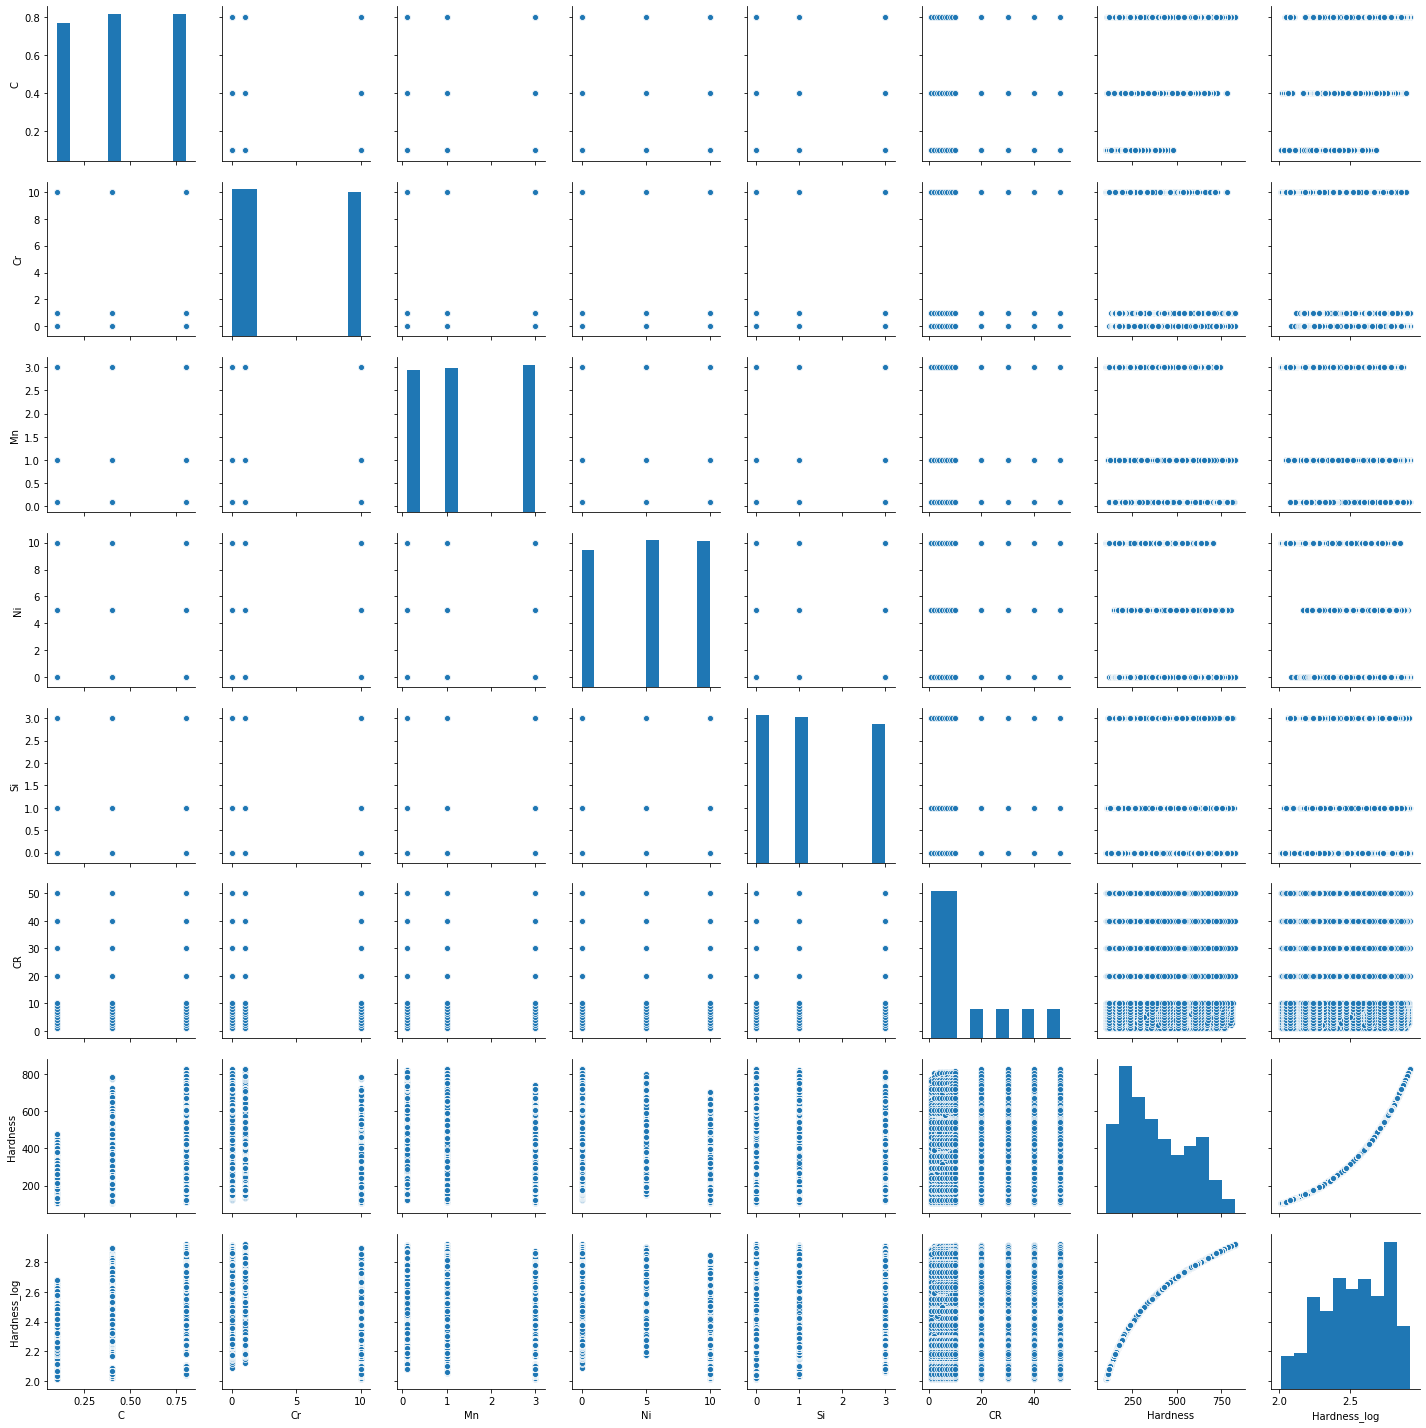

In [4]:
sns.pairplot(dataset)

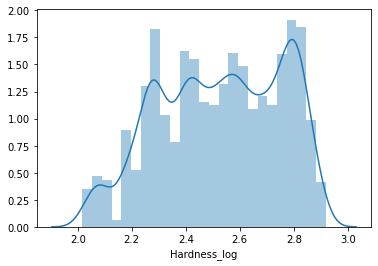

In [5]:
sns.distplot(dataset['Hardness_log']);

In [6]:
dataset.corr()

,C,Cr,Mn,Ni,Si,CR,Hardness,Hardness_log
C,1.000000e+00,6.966048e-03,-2.287167e-02,-3.520842e-02,2.827932e-02,7.717837e-18,0.205004,0.139348
Cr,6.966048e-03,1.000000e+00,1.349927e-03,7.597540e-03,-7.221963e-03,4.099898e-17,-0.332665,-0.355447
Mn,-2.287167e-02,1.349927e-03,1.000000e+00,-2.390605e-02,1.796596e-02,9.430984e-18,-0.301391,-0.295572
Ni,-3.520842e-02,7.597540e-03,-2.390605e-02,1.000000e+00,3.008054e-02,4.305762e-17,-0.283751,-0.319337
Si,2.827932e-02,-7.221963e-03,1.796596e-02,3.008054e-02,1.000000e+00,-3.188884e-17,-0.161180,-0.147926
CR,7.717837e-18,4.099898e-17,9.430984e-18,4.305762e-17,-3.188884e-17,1.000000e+00,0.071525,0.062323
Hardness,2.050042e-01,-3.326648e-01,-3.013906e-01,-2.837509e-01,-1.611805e-01,7.152494e-02,1.000000,0.972450
Hardness_log,1.393480e-01,-3.554471e-01,-2.955719e-01,-3.193373e-01,-1.479262e-01,6.232339e-02,0.972450,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9968 entries, 0 to 9967
Data columns (total 8 columns):
C               9968 non-null float64
Cr              9968 non-null int64
Mn              9968 non-null float64
Ni              9968 non-null int64
Si              9968 non-null int64
CR              9968 non-null int64
Hardness        9968 non-null float64
Hardness_log    9968 non-null float64
dtypes: float64(4), int64(4)
memory usage: 623.1 KB


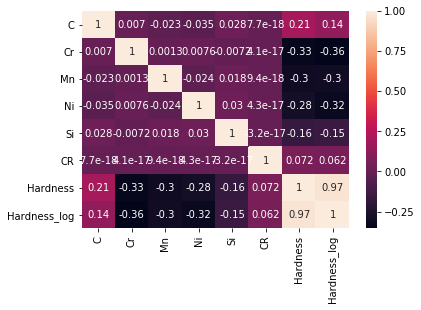

In [8]:
sns.heatmap(dataset.corr(),annot=True)

In [9]:
dataset.describe()

,C,Cr,Mn,Ni,Si,CR,Hardness,Hardness_log
count,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000
mean,0.440309,3.622191,1.385253,5.105337,1.299157,13.928571,381.445609,2.526732
std,0.285411,4.481360,1.215051,4.056877,1.238083,14.806457,184.118918,0.224297
min,0.100000,0.000000,0.100000,0.000000,0.000000,1.000000,104.017000,2.017104
25%,0.100000,0.000000,0.100000,0.000000,0.000000,4.000000,220.014000,2.342450
50%,0.400000,1.000000,1.000000,5.000000,1.000000,7.500000,342.804500,2.535047
75%,0.800000,10.000000,3.000000,10.000000,3.000000,20.000000,537.512000,2.730388
max,0.800000,10.000000,3.000000,10.000000,3.000000,50.000000,827.946000,2.918002


In [10]:
dataset.shape

(9968, 8)

In [11]:
dataset.isnull().any()

C               False
Cr              False
Mn              False
Ni              False
Si              False
CR              False
Hardness        False
Hardness_log    False
dtype: bool

In [12]:
X = dataset[['C', 'Cr', 'Mn', 'Ni', 'Si', 'CR']].values
y = dataset['Hardness_log'].values

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
#seabornInstance.distplot(dataset['quality'])

<Figure size 1080x720 with 0 Axes>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Simple Linear Regression model on the Training set

In [15]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#Print out the coefficients of the model
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [ 0.10250343 -0.01781389 -0.05486729 -0.01742708 -0.02488625  0.00082364]


In [17]:
y_pred = regressor.predict(X_train)

Text(0, 0.5, 'Predicted Y')

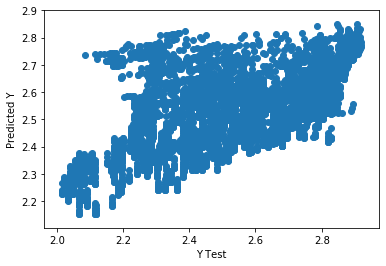

In [18]:
plt.scatter(y_train,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0.5, 1.0, 'Residuals PDF')

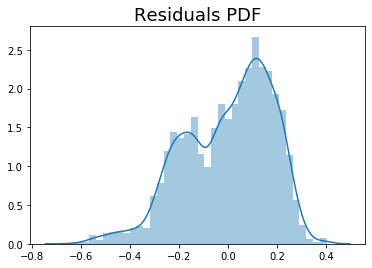

In [19]:
sns.distplot(y_train - y_pred)

# Include a title
plt.title("Residuals PDF", size=18)

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 0.14966024085148996
Mean Squared Error: 0.03222432817815923
Root Mean Squared Error: 0.1795113594683056


In [21]:
# Find the R-squared of the model
regressor.score(X_train,y_train)

0.35632521604469825

In [22]:
regressor.intercept_

2.732259026308569

In [23]:

regressor.coef_

array([ 0.10250343, -0.01781389, -0.05486729, -0.01742708, -0.02488625,
        0.00082364])

# Testing

In [24]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_pred_test = regressor.predict(X_test)

Text(0, 0.5, 'Predicted Y')

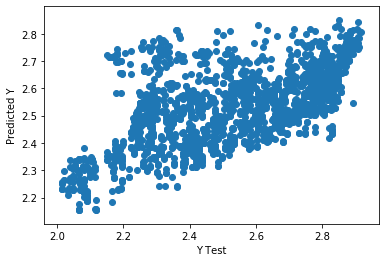

In [25]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [26]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(y_pred_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,2.544894
1,2.515481
2,2.492808
3,2.688698
4,2.513194


In [27]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = y_test
df_pf


,Prediction,Target
0,2.544894,2.250881
1,2.515481,2.604349
2,2.492808,2.239887
3,2.688698,2.829724
4,2.513194,2.602859
5,2.440153,2.779026
6,2.594326,2.320767
7,2.315282,2.380314
8,2.428346,2.622637
9,2.638670,2.829132


In [28]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [29]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,2.544894,2.250881,-0.294014,13.062154
1,2.515481,2.604349,0.088868,3.412289
2,2.492808,2.239887,-0.252920,11.291651
3,2.688698,2.829724,0.141027,4.983763
4,2.513194,2.602859,0.089665,3.444875
5,2.440153,2.779026,0.338873,12.193948
6,2.594326,2.320767,-0.273559,11.787452
7,2.315282,2.380314,0.065032,2.732083
8,2.428346,2.622637,0.194291,7.408226
9,2.638670,2.829132,0.190462,6.732153


In [30]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,1994.000000,1994.000000,1994.000000,1994.000000
mean,2.529313,2.527812,-0.001500,6.065316
std,0.135884,0.226480,0.181436,4.373994
min,2.154134,2.017104,-0.570640,0.000078
25%,2.432213,2.343405,-0.138411,2.803159
50%,2.534594,2.539429,0.032180,5.415753
75%,2.631292,2.738250,0.139803,8.296536
max,2.849957,2.915754,0.400197,26.538735


In [31]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
1058,2.45,2.45,-0.00,0.00
1664,2.70,2.70,-0.00,0.00
1556,2.70,2.70,0.00,0.01
680,2.52,2.52,0.00,0.01
1748,2.57,2.57,0.00,0.01
1813,2.85,2.85,-0.00,0.02
457,2.49,2.49,0.00,0.02
193,2.75,2.75,-0.00,0.02
524,2.52,2.53,0.00,0.03
538,2.39,2.39,0.00,0.03


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 0.15040587815708395
Mean Squared Error: 0.03290492517205965
Root Mean Squared Error: 0.181397147640363


In [33]:
regressor.score(X_test,y_test)

0.3581692453824024

In [34]:
model = sm.OLS(y_test,X_test)
results = model.fit()
results_summary = results.summary()

In [35]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              2120.
Date:                Thu, 07 May 2020   Prob (F-statistic):                        0.00
Time:                        01:30:36   Log-Likelihood:                         -2691.2
No. Observations:                1994   AIC:                                      5394.
Df Residuals:                    1988   BIC:                                      5428.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8449      0.061     30.331      0.000       1.726       1.964
x2             0.0379      0.004      8.456      0.000       0.029       0.047
x3             0.2485      0.016     15.637      0.000       0.217       0.280
x4             0.0737      0.005     15.544      0.000       0.064       0.083
x5             0.1967      0.016     12.004      0.000       0.165       0.229
x6             0.0201      0.001     15.007      0.000       0.017       0.023
==============================================================================
Omnibus:                       53.330   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.834
Skew:                          -0.367   Prob(JB):                     3.37e-12
Kurtosis:                       2.689   Cond. No.                         61.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

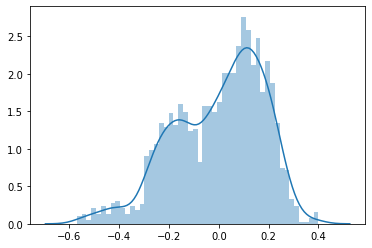

In [36]:
sns.distplot((y_test-y_pred_test),bins=50);


In [37]:
y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred)
df = pd.DataFrame( y_test_df, y_pred_df)
df1 = df.head(25)

In [38]:
x_df = pd.DataFrame(X)
coefficients = pd.DataFrame(regressor.coef_,x_df.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
0,0.10
1,-0.02
2,-0.05
3,-0.02
4,-0.02
5,0.00


In [39]:
print('intercept:', regressor.intercept_)

intercept: 2.732259026308569
